In [1]:
#Step 1. 필요한 모듈을 실행합니다
from konlpy.tag import Kkma
import matplotlib.pyplot as plt  #pip 먼저 해야함
from matplotlib import font_manager, rc  #pip 먼저 해야함  
from wordcloud import WordCloud   #pip 먼저 해야함
# wordcloud 설치할 때 setuptools 에러나면 아래 코드 실행후 재실행
# pip install -U pip setuptools

from collections import Counter
import numpy as np
kkma = Kkma( )


In [2]:
# Step 2. 파일 불러와서 형태소 분석하기
data1 = open("c:\\temp\\경주여행_지식인_2016_2.txt").read()
data1
data2 = kkma.nouns(data1)
data3 = Counter(data2)


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\temp\\경주여행_지식인_2016_2.txt'

In [9]:
# Step 3. 불용어 제거하기
stop_words = open("c:\\temp\\stop_words.txt").read()
data3 = [ each_word for each_word in data2 
             if each_word not in stop_words ]
data3
#1글자 이하이거나 10 글자 이상인 단어 삭제하기
data4=[ ]
for i in range(0,len(data3)) :
       if len(data3[i]) >= 2 | len(data3[i]) <= 10 :
            data4.append(data3[i])

In [10]:
#Step 4. 단어 별 빈도수 집계하기
data5 = Counter(data4)
data6 = data5.most_common(100)
tmp_data = dict(data6)


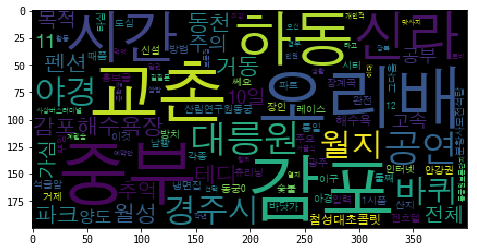

In [11]:
# Step 5. 워드 클라우드 그리기
wordcloud = WordCloud(font_path='c:\windows\fonts\HMKMG.TTF' ,
                      relative_scaling = 0.2,
                      background_color='black',
                      ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show( )

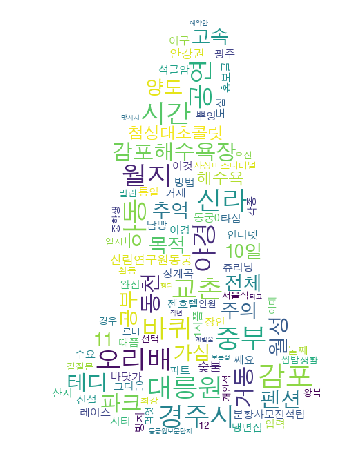

In [12]:
import numpy as np        #pip install numpy 해야 함
from PIL import Image     #pip install Image 해야 함
from wordcloud import ImageColorGenerator
alice_mask = np.array(Image.open("c:\\temp\\image\\alice.jpg"))
wc = WordCloud(font_path='c:\windows\fonts\HMKMG.TTF' ,
                      relative_scaling = 0.2, mask=alice_mask ,
                      background_color='white',
                      min_font_size=1 ,
                      max_font_size=40,
                      max_words=2000,
                      ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show( )

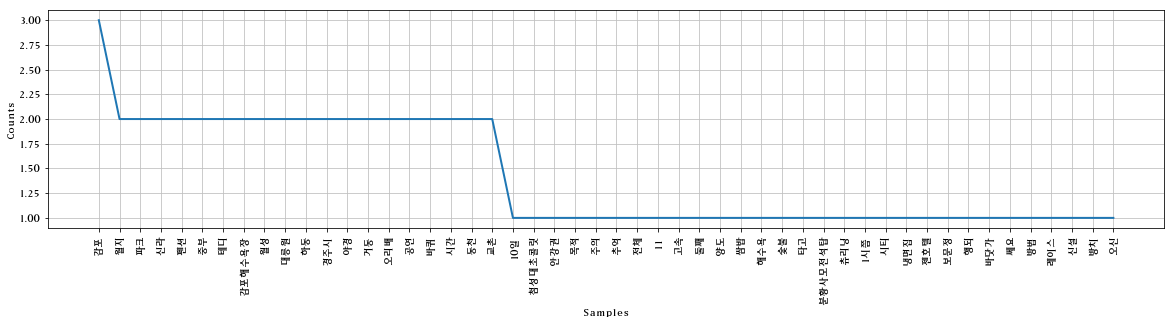

In [21]:
# 그래프에 출력되는 한글을 위해 폰트 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_location = "C:/Windows/Fonts/HYCYSM.TTF"
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

import nltk
plt.figure(figsize=(20,4))

from nltk.probability import FreqDist
g_data4 = FreqDist(data4)

#g_data4 = nltk.Text(data4 , name=" 다빈도 단어 그래프 출력하기")
g_data4.plot(50)
